## Hierarchical k-means

Hierarchical k-means, also known as hierarchical clustering with k-means, is a combination of two popular clustering techniques: hierarchical clustering and k-means clustering. It's a method that can be used for data clustering and provides a hierarchical structure of clusters. Here's how it works:

1. **Hierarchical Clustering**:
   - Initially, each data point is considered as a single cluster.
   - The algorithm then iteratively merges the closest clusters into larger clusters until there is only one cluster containing all data points. This process generates a hierarchy of clusters, represented as a tree-like structure called a dendrogram.

2. **K-Means Clustering**:
   - In k-means clustering, you specify the number of clusters (k) you want to create in advance.
   - The algorithm starts with k initial cluster centroids.
   - It assigns each data point to the nearest centroid and updates the centroids as the mean of the points in each cluster.
   - This process iterates until convergence, where the centroids no longer change significantly or a specified number of iterations are reached.

3. **Combining the Two**:
   - Hierarchical k-means takes the hierarchy created by hierarchical clustering and applies k-means clustering at a specific level of the hierarchy.
   - You can choose the number of clusters you want to obtain at this level (k).
   - This allows you to get both a hierarchical view of the data's clustering and more fine-grained clusters within a particular level of the hierarchy.

Advantages of Hierarchical K-Means:
- It combines the benefits of hierarchical and k-means clustering.
- It provides a hierarchical structure that can be useful for exploring data at different levels of granularity.
- It allows you to obtain a fixed number of clusters (k) without the need for trial-and-error.

Disadvantages:
- It can be computationally expensive, especially when dealing with large datasets.
- The choice of k and the level at which to apply k-means can still be somewhat subjective.

NOTE : In practice, hierarchical k-means can be a useful approach when you want to explore hierarchical relationships in your data while also obtaining a predetermined number of clusters for analysis. However, it's important to consider the trade-offs in terms of computational complexity and the interpretability of the resulting hierarchy.

## Steps
Hierarchical clustering is a method used to create a hierarchy of clusters in a dataset. There are two main types of hierarchical clustering: agglomerative and divisive. Agglomerative clustering is the more commonly used approach and is often referred to simply as hierarchical clustering. Here are the steps for performing agglomerative hierarchical clustering:

1. **Initialization**:
   - Start by treating each data point as a single cluster. This means if you have N data points, you start with N clusters, one for each data point.

2. **Calculate Pairwise Distances or Similarities**:
   - Compute the pairwise distances or similarities between all clusters. The choice of distance metric (e.g., Euclidean distance, Manhattan distance) or similarity measure (e.g., correlation coefficient, cosine similarity) depends on the nature of your data and the problem you're solving.

3. **Merge the Closest Clusters**:
   - Identify the two clusters that are closest to each other based on the distance or similarity measure.
   - Merge these two clusters into a single cluster.
   - The choice of how to measure "closeness" can be defined using linkage criteria, such as single linkage, complete linkage, or average linkage:
     - Single Linkage: Minimum pairwise distance between any two points in the two clusters.
     - Complete Linkage: Maximum pairwise distance between any two points in the two clusters.
     - Average Linkage: Average pairwise distance between points in the two clusters.

4. **Update the Distance Matrix**:
   - Recalculate the pairwise distances or similarities between the newly formed cluster and all remaining clusters.
   - This step is necessary to reflect the changes in cluster composition after the merge.

5. **Repeat**:
   - Steps 3 and 4 are repeated iteratively until only one cluster remains, encompassing all data points.
   - During this process, a tree-like structure called a dendrogram is constructed. The dendrogram shows the sequence of merges and can be used to visualize the hierarchy of clusters.

6. **Cutting the Dendrogram**:
   - To obtain a specific number of clusters (k), you can cut the dendrogram at the desired height. This height corresponds to the level of granularity you want in your clustering solution.
   - The choice of where to cut the dendrogram depends on the problem and your understanding of the data.

7. **Assign Data Points to Clusters**:
   - Once you have determined the number of clusters, you can assign each data point to its corresponding cluster.

8. **Visualization and Analysis**:
   - Visualize the hierarchical structure of clusters using the dendrogram.
   - Analyze the resulting clusters to gain insights into the data or use them for further analysis.

### AgglomerativeClustering
```
sklearn.cluster.AgglomerativeClustering()
```

linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

‘ward’ minimizes the variance of the clusters being merged.

‘average’ uses the average of the distances of each observation of the two sets.

‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

‘single’ uses the minimum of the distances between all observations of the two sets.

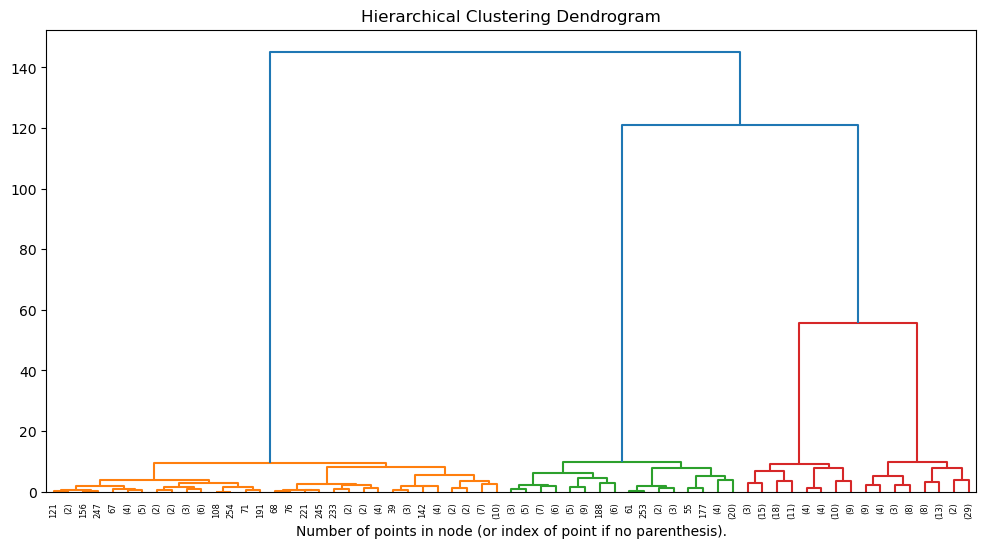

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


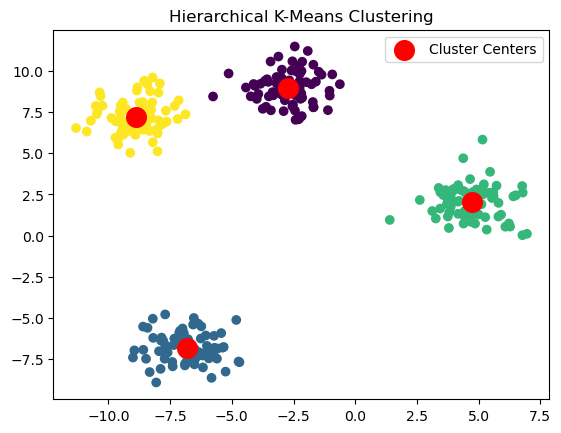

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agg_clustering.fit(data)

# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Choose the number of clusters from the dendrogram
n_clusters = 4  # You can adjust this based on the dendrogram

# Perform K-Means clustering on the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('Hierarchical K-Means Clustering')
plt.legend()
plt.show()


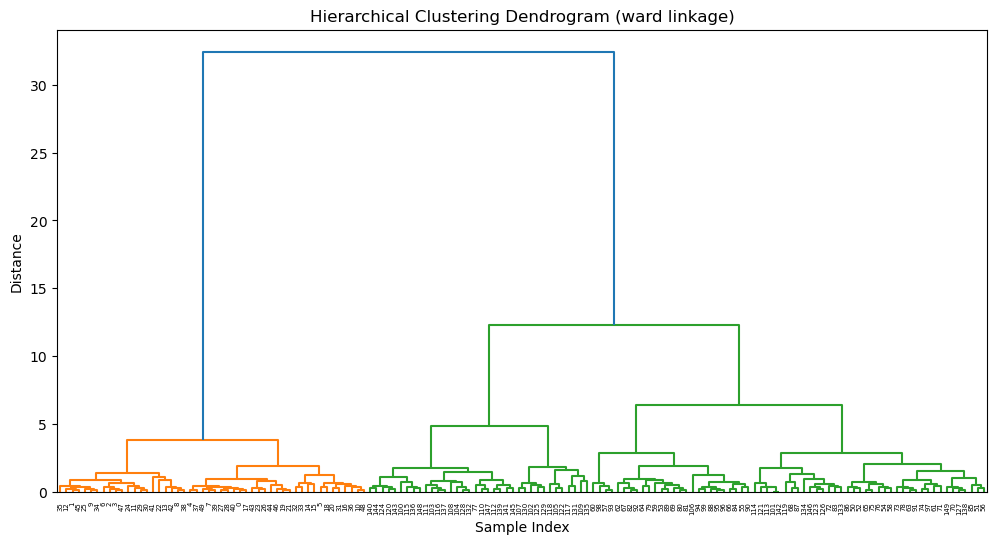

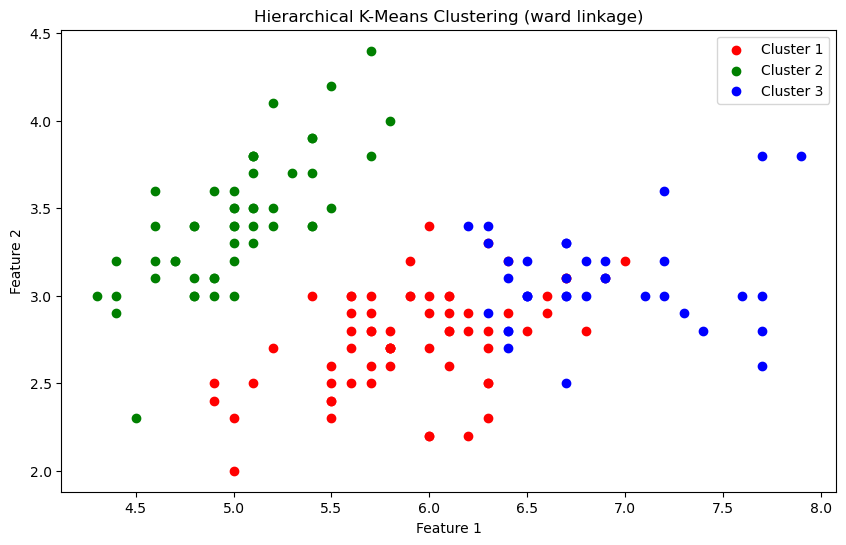

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using AgglomerativeClustering
n_clusters = 3  # Number of clusters
linkage_method = 'ward'  # Linkage method for hierarchical clustering

agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
agg_cluster.fit(X)
labels = agg_cluster.labels_

# Plot the dendrogram (hierarchical tree)
linkage_matrix = linkage(X, method=linkage_method)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot the clustered data
plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b']
for i in range(n_clusters):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i+1}', c=colors[i])

plt.title(f'Hierarchical K-Means Clustering ({linkage_method} linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
